In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [ ]:
#1

# Load the dataset
url = "https://richardson.byu.edu/220/bike_sharing_data.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())


   bikes_rented  temperature   humidity  wind_speed  is_holiday
0     28.328610    68.727006  32.959305    7.851171           0
1     16.102741    97.535715  57.933066    7.409364           0
2     30.334790    86.599697  81.106209   27.187637           0
3     15.807644    79.932924  71.255742    7.486386           1
4     12.657379    57.800932  76.459280    8.158492           0


In [ ]:
#2
# Basic Summary
print(data.describe())

# Check for missing values
print(data.isnull().sum())


       bikes_rented  temperature     humidity   wind_speed   is_holiday
count   1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean      16.907198    74.512828    55.491211    15.072172     0.491000
std       12.739693    14.606868    20.453293     8.720226     0.500169
min      -23.860167    50.231601    20.225278     0.000349     0.000000
25%        8.273381    61.798663    36.875199     7.840529     0.000000
50%       16.798373    74.840369    56.311373    15.018418     0.000000
75%       25.683677    87.215979    73.232554    22.773106     1.000000
max       56.445120    99.985884    89.958961    29.934626     1.000000
bikes_rented    0
temperature     0
humidity        0
wind_speed      0
is_holiday      0
dtype: int64


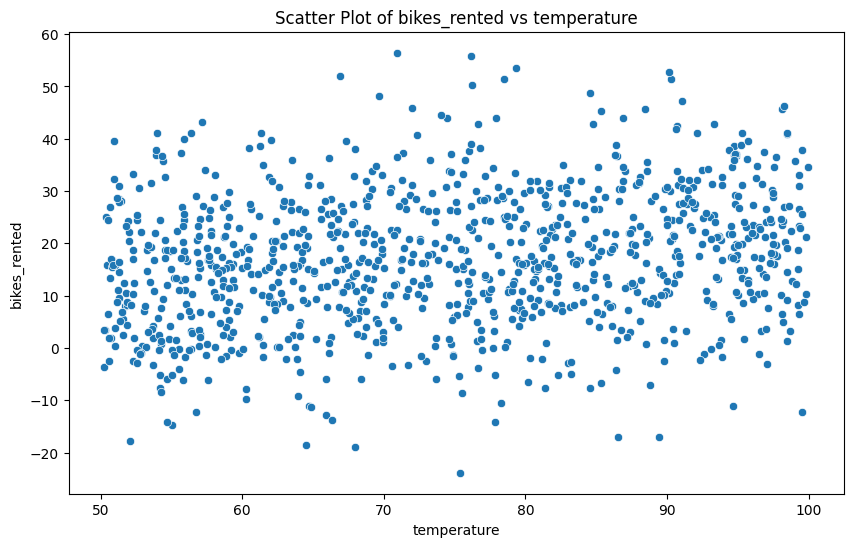

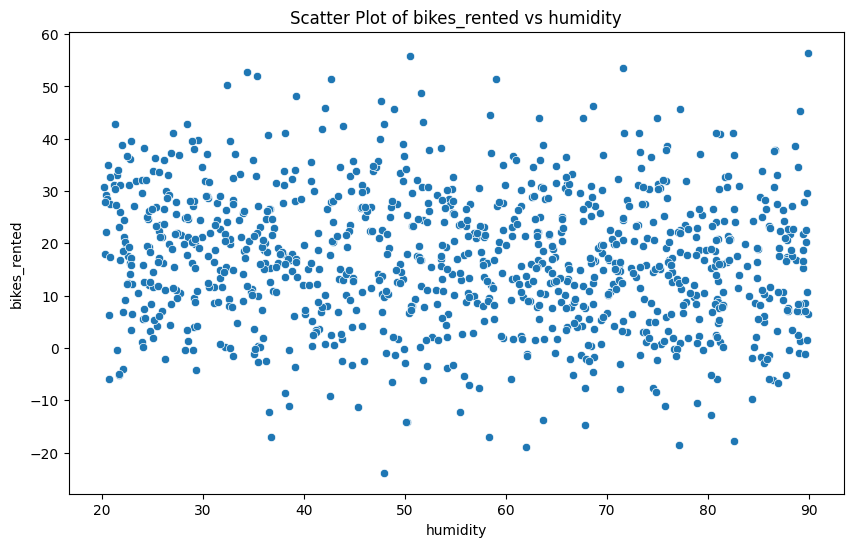

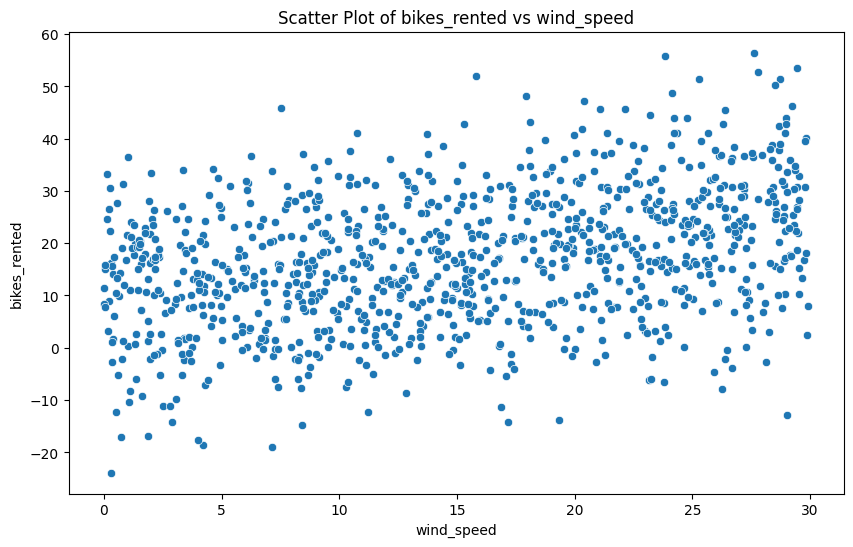

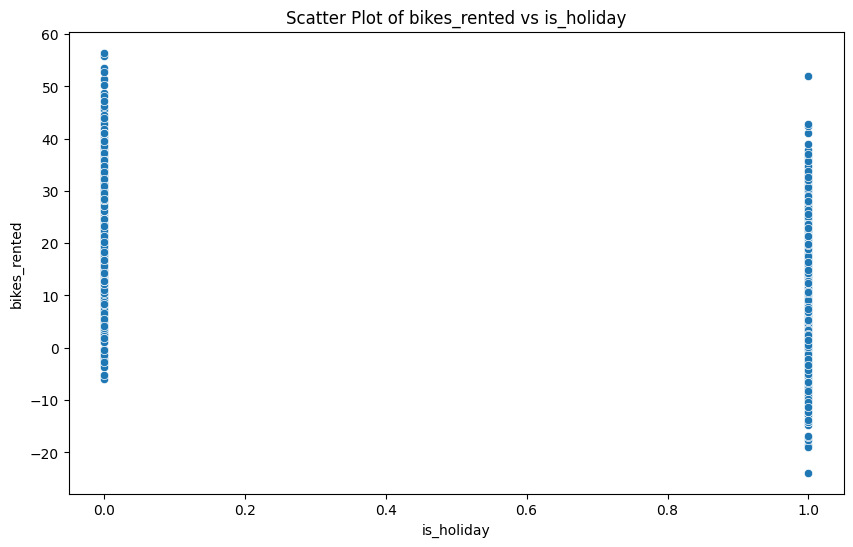

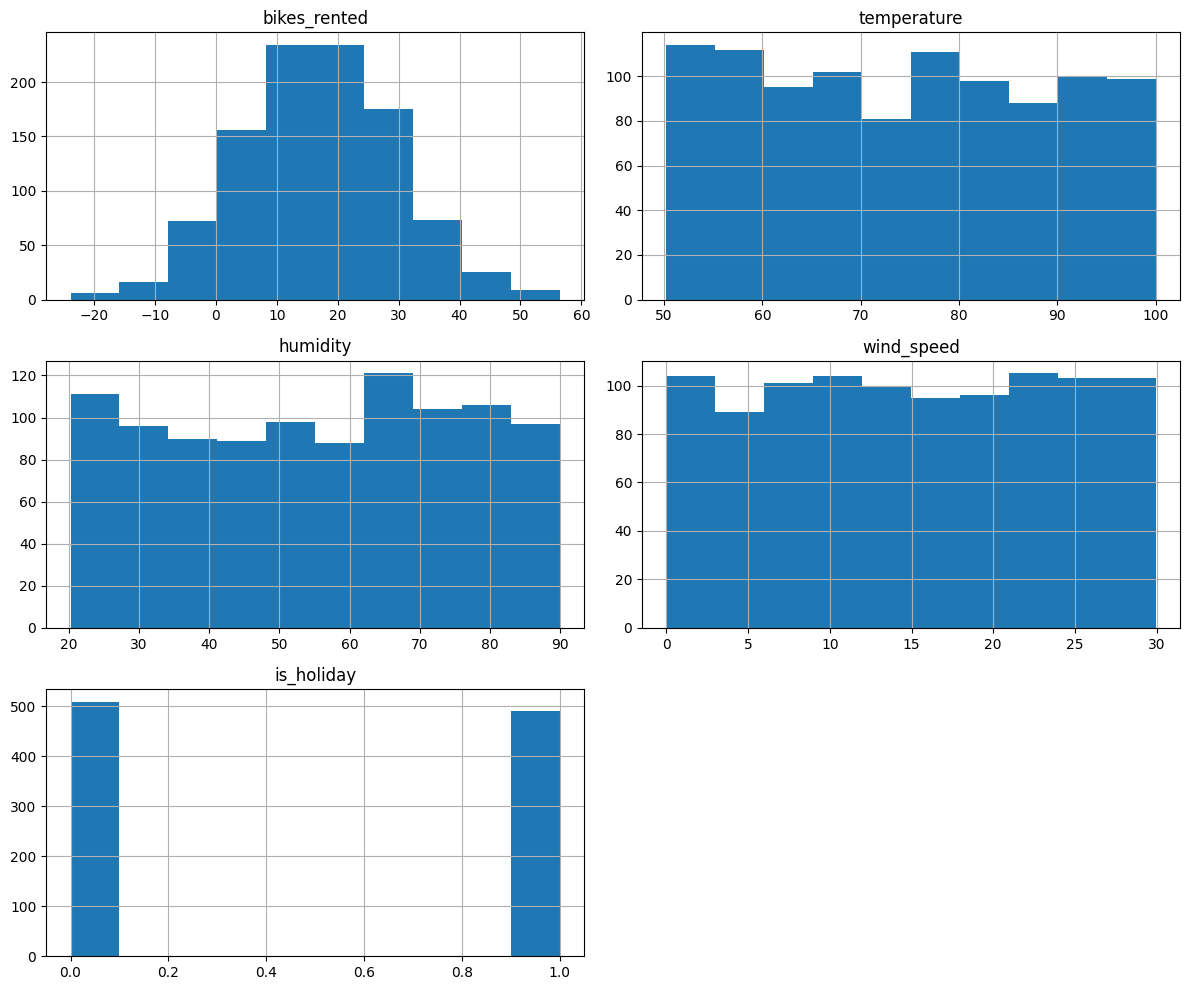

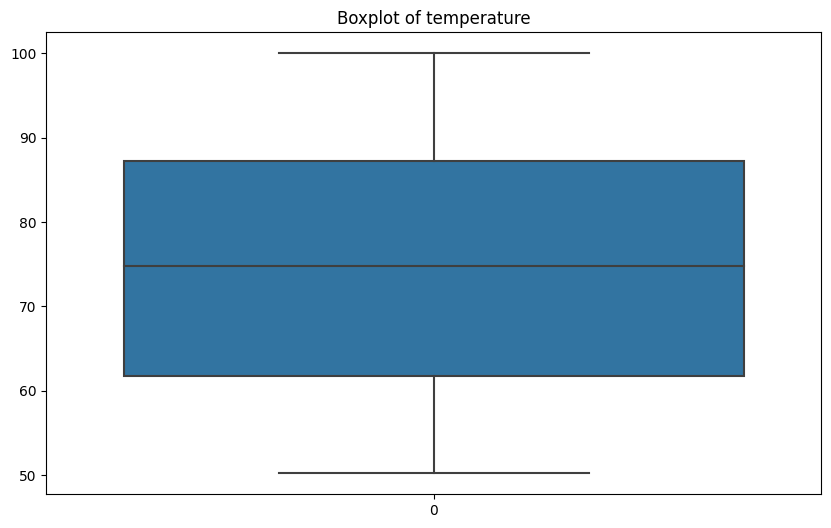

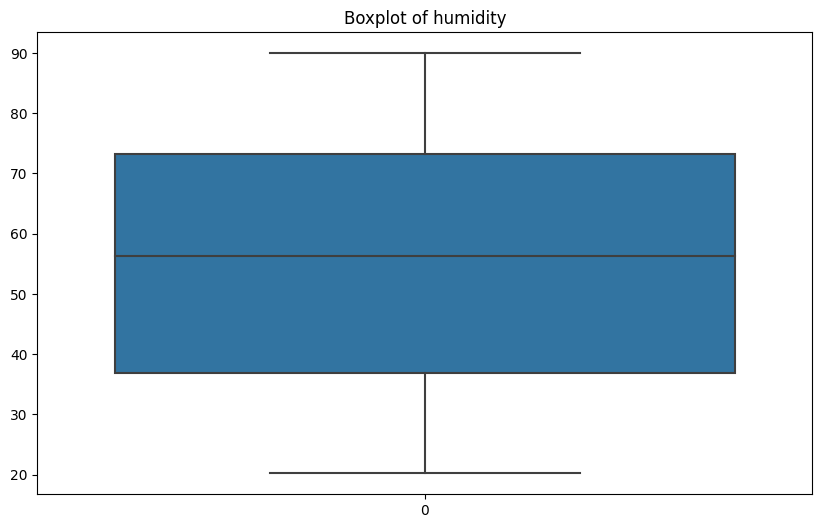

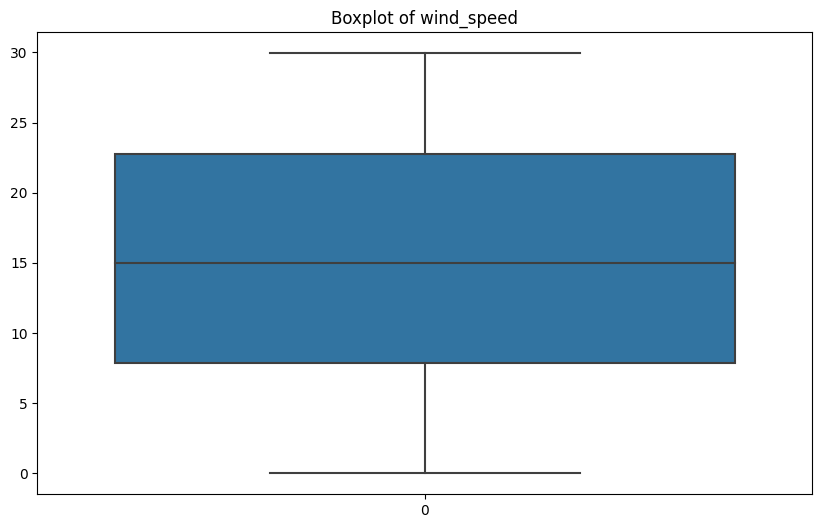

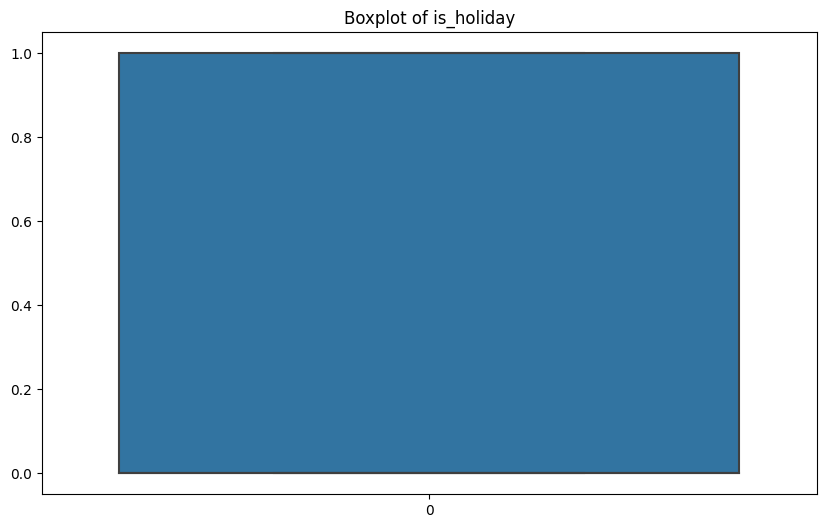

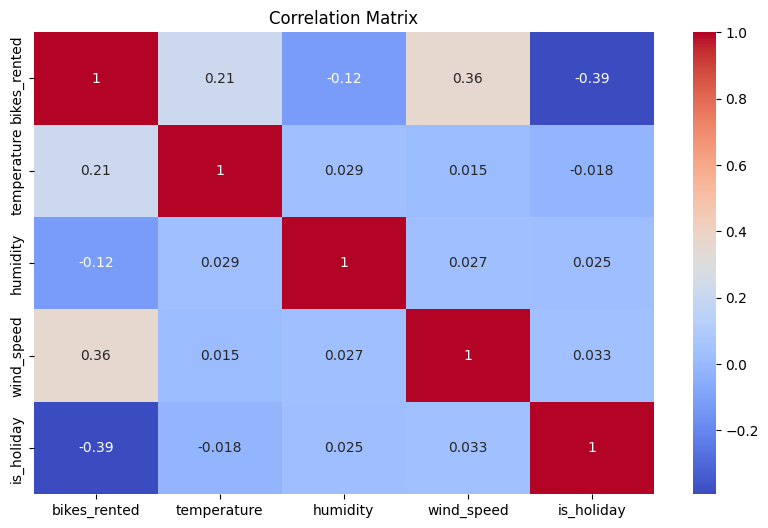

In [ ]:
# Scatter Plots
features = ['temperature', 'humidity', 'wind_speed', 'is_holiday']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=feature, y='bikes_rented')
    plt.title(f'Scatter Plot of bikes_rented vs {feature}')
    plt.show()

# Histograms
data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Boxplots
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

# Correlation Matrix
correlation = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#3
# a) choosen variable 'temperature'

# b)
import statsmodels.api as sm

# Adding a constant to the model (for intercept)
X = sm.add_constant(data['temperature'])
y = data['bikes_rented']

model = sm.OLS(y, X).fit()

#c)
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:           bikes_rented   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     47.93
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           7.91e-12
Time:                        03:28:48   Log-Likelihood:                -3939.7
No. Observations:                1000   AIC:                             7883.
Df Residuals:                     998   BIC:                             7893.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.9958      2.048      1.463      

In [ ]:
#4
# a)b) Prepare the data for regression
# We'll include temperature, humidity, wind_speed, and is_holiday as predictors
X = data[['temperature', 'humidity', 'wind_speed', 'is_holiday']]
X = sm.add_constant(X)  # Adds a constant column for the intercept
y = data['bikes_rented']

model = sm.OLS(y, X).fit()

#c)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           bikes_rented   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     132.3
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           1.31e-90
Time:                        03:37:35   Log-Likelihood:                -3750.0
No. Observations:                1000   AIC:                             7510.
Df Residuals:                     995   BIC:                             7534.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.8123      1.986      2.423      

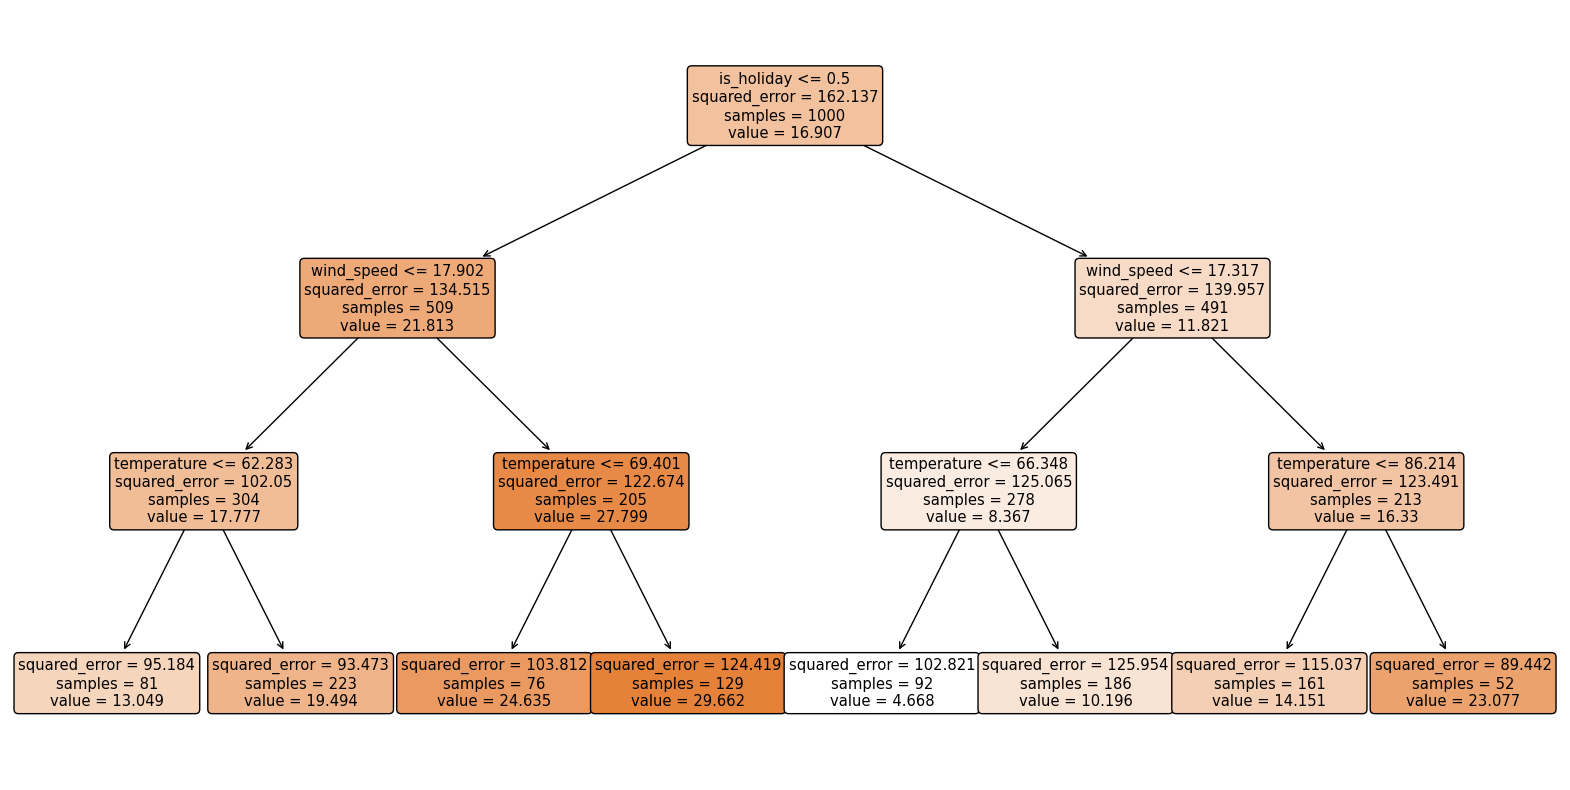

In [ ]:
#5
X = data[['temperature', 'humidity', 'wind_speed', 'is_holiday']]
y = data['bikes_rented']

# Regression tree
reg_tree = DecisionTreeRegressor(max_depth=3)  # Limiting the depth for visualization purposes
reg_tree.fit(X, y)

# Graph
plt.figure(figsize=(20,10))
plot_tree(reg_tree, filled=True, feature_names=X.columns, rounded=True)
plt.show()

In [ ]:
#6
# Given coefficients and values from models
simple_regression_coef = 0.1867
simple_regression_const = 2.9958

multiple_regression_coef_temperature = 0.1789
multiple_regression_coef_wind_speed = 0.5404
multiple_regression_const = 4.8123

# Given weather forecast
temperature = 72
humidity = 45  # We don't use humidity as it wasn't significant in the multiple regression model
wind_speed = 10
is_holiday = 0  # 0 since it's not a holiday

# Simple Linear Regression prediction
simple_regression_prediction = simple_regression_const + simple_regression_coef * temperature

# Multiple Linear Regression prediction
multiple_regression_prediction = (multiple_regression_const +
                                 multiple_regression_coef_temperature * temperature +
                                 multiple_regression_coef_wind_speed * wind_speed)

# Regression Tree prediction
# Given the decision tree paths, we can directly use conditions to reach the leaf
if is_holiday <= 0.5:
    if wind_speed <= 17.9:
        if temperature <= 62.28:
            regression_tree_prediction = 13.05
        else:
            regression_tree_prediction = 19.49
    else:
        if temperature <= 69.4:
            regression_tree_prediction = 24.64
        else:
            regression_tree_prediction = 29.66
else:
    # This path is not relevant for the provided case, but kept for completeness
    if wind_speed <= 17.32:
        if temperature <= 66.35:
            regression_tree_prediction = 4.67
        else:
            regression_tree_prediction = 10.20
    else:
        if temperature <= 86.21:
            regression_tree_prediction = 14.15
        else:
            regression_tree_prediction = 23.08

# Output the predictions
print(f"Simple Linear Regression Prediction: {simple_regression_prediction:.2f} bikes")
print(f"Multiple Linear Regression Prediction: {multiple_regression_prediction:.2f} bikes")
print(f"Regression Tree Prediction: {regression_tree_prediction:.2f} bikes")


Simple Linear Regression Prediction: 16.44 bikes
Multiple Linear Regression Prediction: 23.10 bikes
Regression Tree Prediction: 19.49 bikes
